### Train and Split Dataset

In [1]:


# Imports
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Grayscale

In [2]:
transform = Compose([
    ToTensor(),
])
cifar10_data = datasets.CIFAR10(
    root='data',
    download=True,
    transform=transform
)

100%|██████████| 170498071/170498071 [01:45<00:00, 1610703.08it/s]


Extracting data\cifar-10-python.tar.gz to data


In [3]:
# Print the number of samples in the loaded dataset
print(f"Number of samples: {len(cifar10_data)}")
print(f"Class names: {cifar10_data.classes}")

Number of samples: 50000
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Label: horse
Image size: torch.Size([3, 32, 32])


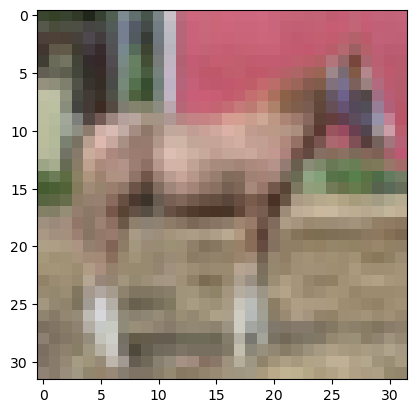

In [4]:
# Choose a random sample
import matplotlib.pyplot as plt
import random
random.seed(2021)


image, label = cifar10_data[random.randint(0, len(cifar10_data))]
print(f"Label: {cifar10_data.classes[label]}")
print(f"Image size: {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [5]:
transform = Compose([
    ToTensor(),
])
training_data = datasets.CIFAR10(
    root='data',
    train = True,
    download=True,
    transform=transform
)

test_data = datasets.CIFAR10(
    root='data',
    train= False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


### Datasets and Dataloaders

In [6]:
# def seed_worker(worker_id):
#   worker_seed = torch.initial_seed() % 2**32
#   numpy.random.seed(worker_seed)
#   random.seed(worker_seed)


# g_seed = torch.Generator()
# g_seed.manual_seed(my_seed)

# DataLoader(
#     train_dataset,
#     batch_size=batch_size,
#     num_workers=num_workers,
#     worker_init_fn=seed_worker,
#     generator=g_seed
#     )
# Create dataloaders with
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Batch size: torch.Size([64, 3, 32, 32])


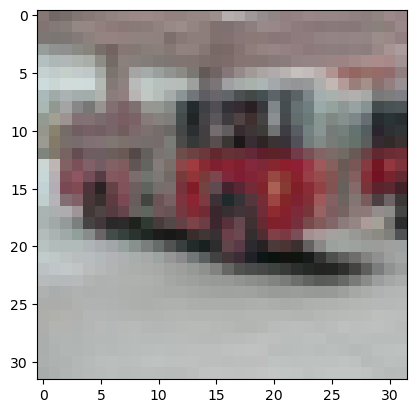

In [7]:


# Load the next batch
batch_images, batch_labels = next(iter(train_dataloader))
print('Batch size:', batch_images.shape)

# Display the first image from the batch
plt.imshow(batch_images[0].permute(1, 2, 0))
plt.show()

#### Data Augmentation - Transformations

Files already downloaded and verified


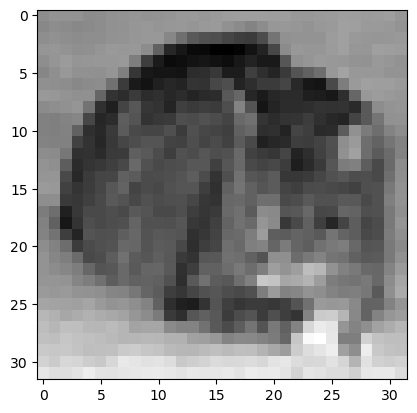

In [8]:
def my_data_load():
    data = datasets.CIFAR10(
        root = 'data',
        download= True,
        transform=Compose([ToTensor(), Grayscale()])
    )
    image, label = data[random.randint(0, len(data))]
    plt.imshow(image.permute(1, 2, 0), cmap="gray")
    plt.show()

    return data

# Set the random seed
seed = 2021
torch.manual_seed(seed)
## After implementing the above code, uncomment the following lines to test your code
data = my_data_load()